In [3]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

from keras.layers import Activation, BatchNormalization

from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

from keras_tuner import RandomSearch

from tensorflow.keras.datasets import cifar100

In [4]:
(X_train_val, y_train_val), (X_test, y_test) = cifar100.load_data()

X_train, X_val = X_train_val[10000:] / 255.0, X_train_val[:10000] / 255.0

X_test = X_test / 255.0

y_train, y_val = y_train_val[10000:], y_train_val[:10000]

print(X_train.shape)

print(X_test.shape)

/home/celvin/Repos/School/ai-del-2/.venv/lib/python3.13/site-packages/keras/src/datasets/cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
# Define model
model = Sequential()
model.add(Input(shape=(32, 32, 3))) # 32 x 32 pixels
# model.add(RandomFlip(mode='horizontal'))
# model.add(RandomRotation(0.15))
# model.add(RandomZoom(0.15))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) # 16 x 16 pixels
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) # 8 x 8 pixels
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) # 4 x 4 pixels
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) # 2 x 2 pixels
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

In [6]:
# Compile model

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [7]:
# Early stopping
early_stopping_monitor = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss')

# Train model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=2, callbacks=[early_stopping_monitor], batch_size=64)

Epoch 1/100


I0000 00:00:1770388832.520270 2833462 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 - 19s - 31ms/step - accuracy: 0.0578 - loss: 4.3156 - val_accuracy: 0.0838 - val_loss: 3.9666
Epoch 2/100
625/625 - 5s - 8ms/step - accuracy: 0.1221 - loss: 3.7043 - val_accuracy: 0.1540 - val_loss: 3.5164
Epoch 3/100
625/625 - 5s - 8ms/step - accuracy: 0.1687 - loss: 3.4053 - val_accuracy: 0.1748 - val_loss: 3.3401
Epoch 4/100
625/625 - 5s - 8ms/step - accuracy: 0.2173 - loss: 3.1249 - val_accuracy: 0.2309 - val_loss: 3.0550
Epoch 5/100
625/625 - 5s - 8ms/step - accuracy: 0.2600 - loss: 2.8987 - val_accuracy: 0.2848 - val_loss: 2.7959
Epoch 6/100
625/625 - 5s - 8ms/step - accuracy: 0.2907 - loss: 2.7351 - val_accuracy: 0.2941 - val_loss: 2.7464
Epoch 7/100
625/625 - 5s - 8ms/step - accuracy: 0.3144 - loss: 2.6295 - val_accuracy: 0.3329 - val_loss: 2.6386
Epoch 8/100
625/625 - 5s - 8ms/step - accuracy: 0.3452 - loss: 2.5064 - val_accuracy: 0.3645 - val_loss: 2.4029
Epoch 9/100
625/625 - 5s - 8ms/step - accuracy: 0.3643 - loss: 2.3858 - val_accuracy: 0.3873 - val_loss: 2.2942
Ep

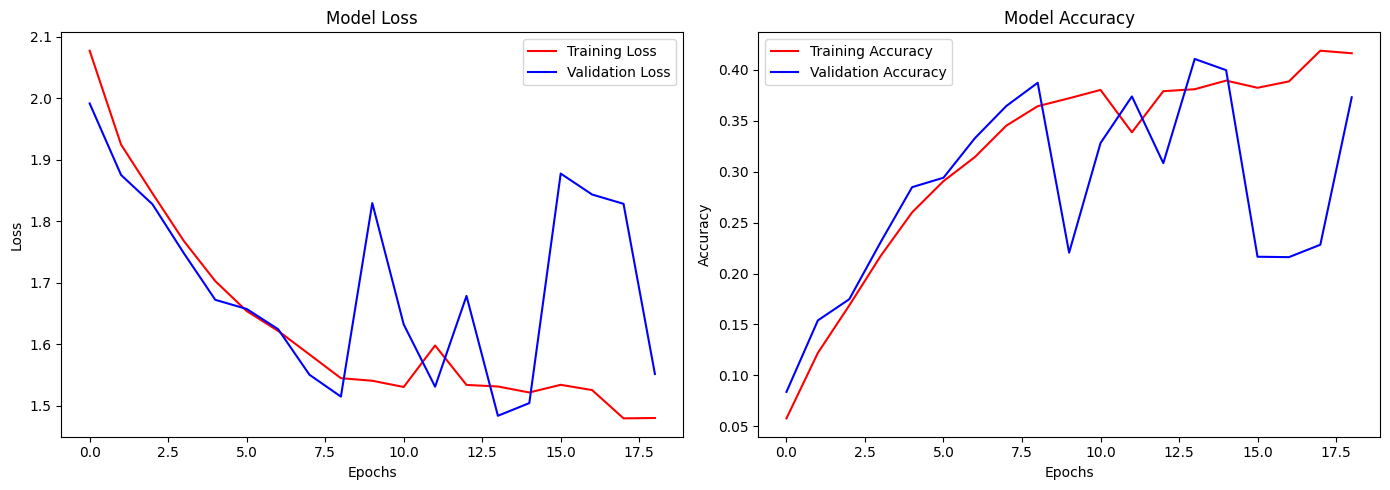

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss
ax1.plot(np.sqrt(history.history['loss']), 'r', label='Training Loss')
ax1.plot(np.sqrt(history.history['val_loss']), 'b', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Model Loss')
ax1.legend()

# Plot 2: Accuracy
ax2.plot(history.history['accuracy'], 'r', label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Model Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [9]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.4294 - loss: 2.1745


[2.174455165863037, 0.4293999969959259]

In [10]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))
    hp_filters_1 = hp.Int('filters_1', min_value=16, max_value=64, step=16)
    model.add(Conv2D(hp_filters_1, kernel_size=(3, 3), padding='same', activation='relu'))

    hp_filters_2 = hp.Int('filters_2', min_value=16, max_value=64, step=16)
    model.add(Conv2D(hp_filters_2, kernel_size=(3, 3), padding='same', activation='relu'))

    if hp.Boolean('batch_norm_1'):
        model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2))) # 16 x 16 pixels

    hp_filters_3 = hp.Int('filters_3', min_value=32, max_value=128, step=32)
    model.add(Conv2D(hp_filters_3, kernel_size=(3, 3), padding='same', activation='relu'))

    hp_filters_4 = hp.Int('filters_4', min_value=32, max_value=128, step=32)
    model.add(Conv2D(hp_filters_4, kernel_size=(3, 3), padding='same', activation='relu'))

    if hp.Boolean('batch_norm_2'):
        model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2))) # 8 x 8 pixels

    hp_filters_5 = hp.Int('filters_5', min_value=64, max_value=256, step=64)
    model.add(Conv2D(hp_filters_5, kernel_size=(3, 3), padding='same', activation='relu'))

    hp_filters_6 = hp.Int('filters_6', min_value=64, max_value=256, step=64)
    model.add(Conv2D(hp_filters_6, kernel_size=(3, 3), padding='same', activation='relu'))

    if hp.Boolean('batch_norm_3'):
        model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2))) # 4 x 4 pixels

    num_conv_layers = hp.Int('num_conv_layers', min_value=1, max_value=6)

    for i in range(num_conv_layers):
        filters = hp.Int(f'filters_{i+6}', min_value=128, max_value=512, step=128)
        model.add(Conv2D(filters, kernel_size=(3, 3), padding='same', activation='relu'))

        if hp.Boolean(f'batch_norm_{i+4}'):
            model.add(BatchNormalization())

    if num_conv_layers <= 1:
        model.add(MaxPooling2D(pool_size=(2, 2))) # 2 x 2 pixels

    model.add(Flatten())

    if hp.Boolean('dropout_flatten'):
        hp_dropout_rate = hp.Choice('dropout_rate_flatten', values=[0.2, 0.4, 0.5])
        model.add(Dropout(rate=hp_dropout_rate))
    
    hp_dense = hp.Int('dense_units', min_value=128, max_value=512, step=128)
    model.add(Dense(units=hp_dense, activation='relu'))

    model.add(Dense(100, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [11]:
import keras_tuner as kt

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    overwrite=True
)

tuner.search(X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    verbose=2,
    callbacks=[early_stopping_monitor]),

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hyperparameters.values)


Trial 20 Complete [00h 00m 43s]
val_accuracy: 0.041600000113248825

Best val_accuracy So Far: 0.3869999945163727
Total elapsed time: 00h 15m 35s
{'filters_1': 64, 'filters_2': 48, 'batch_norm_1': True, 'filters_3': 64, 'filters_4': 96, 'batch_norm_2': False, 'filters_5': 64, 'filters_6': 192, 'batch_norm_3': False, 'num_conv_layers': 1, 'batch_norm_4': True, 'dropout_flatten': False, 'dense_units': 384, 'filters_7': 256, 'batch_norm_5': True, 'filters_8': 256, 'batch_norm_6': True, 'filters_9': 256, 'batch_norm_7': True, 'filters_10': 256, 'batch_norm_8': True, 'dropout_rate_flatten': 0.2, 'filters_11': 384, 'batch_norm_9': False}


/home/celvin/Repos/School/ai-del-2/.venv/lib/python3.13/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

limit = 10000
X_train = X_train[:limit]
X_test = X_test[:limit]
y_train = y_train[:limit]
y_test = y_test[:limit]


X_train = tf.image.resize(X_train, (128, 128))
X_test = tf.image.resize(X_test, (128, 128))

base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base.trainable = False

model = Sequential([
    base,
    Flatten(),
    Dense(100, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2)

y_pred = model.predict(X_test, verbose=2)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = np.mean(y_pred_labels == y_test.flatten())
print(f'Accuracy: {accuracy}')

Epoch 1/50
250/250 - 16s - 62ms/step - accuracy: 0.3199 - loss: 11.3838 - val_accuracy: 0.4330 - val_loss: 9.6451
Epoch 2/50
250/250 - 5s - 21ms/step - accuracy: 0.7576 - loss: 2.5681 - val_accuracy: 0.4480 - val_loss: 10.1637
Epoch 3/50
250/250 - 5s - 21ms/step - accuracy: 0.8758 - loss: 1.1344 - val_accuracy: 0.4645 - val_loss: 10.1013
Epoch 4/50
250/250 - 5s - 21ms/step - accuracy: 0.9351 - loss: 0.4900 - val_accuracy: 0.4780 - val_loss: 10.4279
Epoch 5/50
250/250 - 5s - 22ms/step - accuracy: 0.9615 - loss: 0.2789 - val_accuracy: 0.4780 - val_loss: 11.3142
Epoch 6/50
250/250 - 6s - 22ms/step - accuracy: 0.9747 - loss: 0.1583 - val_accuracy: 0.4995 - val_loss: 10.3711
Epoch 7/50
250/250 - 6s - 22ms/step - accuracy: 0.9814 - loss: 0.1039 - val_accuracy: 0.5000 - val_loss: 10.6836
Epoch 8/50
250/250 - 5s - 22ms/step - accuracy: 0.9906 - loss: 0.0545 - val_accuracy: 0.5005 - val_loss: 10.7393
Epoch 9/50
250/250 - 5s - 22ms/step - accuracy: 0.9944 - loss: 0.0335 - val_accuracy: 0.5185 - 

In [26]:
model.save("resnet50_cifar100.keras")